## Twitter Sentiment Analysis and Realtime Dashboard Plotting

## Imports

In [1]:
#Statitstics and Visuals
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt

#Tweepy
from tweepy import Stream, OAuthHandler, StreamListener
from tweepy.streaming import StreamListener
import twittercred
import json

#Sentiment Analysis
from textblob import TextBlob #More Acccurate
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #Faster
import re


#Dashboard
import plotly 
import plotlywrapper as pw
import dash
from dash.dependencies import Input, Output, Event
import dash_core_components
import dash_html_components

ImportError: cannot import name 'Event'

## Luxury Brands

In [36]:
#Input brand of interest here
brand = ['Gucci']

## Twitter Developer Keys

In [37]:
#API = CONSUMER API KEY
#APIKEY = CONSUMER API SECRET KEY
#ACC = ACCESS TOKEN
#ACCKEY = ACCESS TOKEN SECRET

In [38]:
#Loads twitter credentials
auth = OAuthHandler(twittercred.API, twittercred.APIKEY)
auth.set_access_token(twittercred.ACC, twittercred.ACCKEY)

## Time and data variables

In [39]:
#Creates time as a function seconds.
initime= time.time()

def calctime(x):
    return time.time() - x

In [40]:
#Plotting variables
timex = [] #X var
timeypos = [] #Green Var
timeyneg = [] #Red Var
timeyneu = [] # Blue var
timeysent = [] # Dashed line

In [41]:
count = 0
positive=0
negative=0
neutral=0
combined=0

## Data Compliler

In [42]:
#Creates a class of filters, data modificaitons, etc to create twitter data

class stdOUTlistener(StreamListener):
    
    
#Grabbing Data
    def on_data(self,data):
    
    
#Try used in case of Key error
        try:
            
            #Time setting of tweet
            global initime
            t=int(calctime(initime))
            
            #Data Loading
            all_data=json.loads(data)
            tweet=all_data["text"]
            
            #Tweet Cleaning 
            tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())
            blob=TextBlob(tweet.strip())

            #Sentiment Analysis
            global positive
            global negative  
            global neutral
            global combined  
            global count
            
            count += 1
            sentiment = 0
        
            # Conducts Sentiment Analysis 
            
            for sen in blob.sentences:
                sentiment = sentiment+ sen.sentiment.polarity
                
                #Low threshold most often tweets with pictures or mentions of product are
                #positive from a marketing perspective. Gains more traction. 
    
                if sentiment > 0:
                    positive += 1
                    
                #Negative tweets have a higher threshold. 
                #Vernacular causes noises and positive tweets were False positives.(of Negatives)
                
                elif sentiment <= -.4:
                    negative += 1
                    
                else:
                    neutral +=1
                
                
                combined += sen.sentiment.polarity
                
            
            
            #Creates a list used for plotting
            timex.append(t)
            timeypos.append(positive) 
            timeyneg.append(negative)
            timeyneu.append(neutral) 
            timeysent.append(combined) 
            
         
            
            #print("tweet num", count)
            #print("time", t)
            #print(blob)
            #print("LABELED AS ", sen.sentiment.polarity)
            #print("pos", positive)
            #print("negs", negative)
            #print("neutral", neutral)
            #print("combined sent", compound)
            #print(sentiment)
        

            
        except:
            pass
    def on_error(self, status):
        print(status)
        pass
    

In [43]:
listener = stdOUTlistener()

#Twitter Authentication
auth = OAuthHandler(twittercred.API, twittercred.APIKEY)
auth.set_access_token(twittercred.ACC, twittercred.ACCKEY)

#Creating Streamer, pairs authentication and listerner class
stream = Stream(auth, listener)
stream.filter(track=brand, languages=["en"]);


KeyboardInterrupt: 

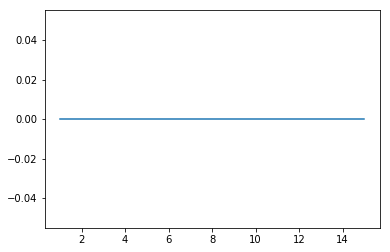

In [44]:
plt.plot(timex, timeypos)
